# Stock price prediction using AI (Google Stock data) 2004 to 2023 

In [1]:
# Stock price prediction using AI (Google Stock data) 2004 to 2023 

In [2]:
#import the libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [3]:
#load the data of Google stock price with a csv file
data = pd.read_csv('GOOG2004to2023.csv')
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
1,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
3,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
4,2004-08-26,2.613952,2.688672,2.606729,2.687676,2.687676,142572401
...,...,...,...,...,...,...,...
4722,2023-05-24,121.879997,122.750000,120.750000,121.639999,121.639999,23087900
4723,2023-05-25,125.209999,125.980003,122.900002,124.349998,124.349998,33812700
4724,2023-05-26,124.065002,126.000000,123.290001,125.430000,125.430000,25154700
4725,2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700


<Axes: >

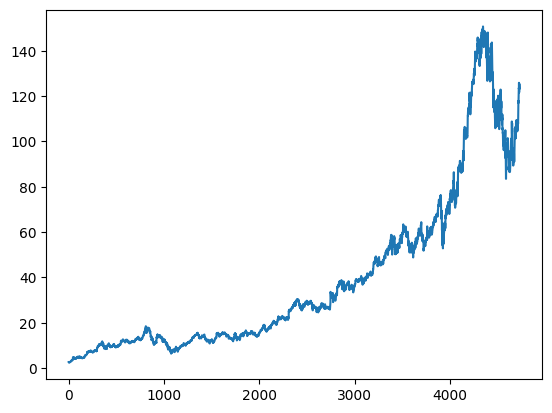

In [4]:
#show the data visually
data['Close'].plot()

In [18]:
#split the data into training & testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]
len(data)# noting but rows in the data

4727

In [19]:
# define the features and target variable
features = ['Open','Volume']
target= 'Close'

In [20]:
#create and train model
model = xgb.XGBRegressor()
model.fit(train_data[features],train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [21]:
#Make the prediction & Show them on Test Data
predictions = model.predict(test_data[features])
print('Model Predictions: ')
print(predictions)

Model Predictions: 
[105.47446  105.33051  104.64822  103.179184 102.891754 102.47045
 102.35977  102.552605 104.89176  108.2729   104.969246 108.13267
 107.78666  107.406136 108.1779   110.27393  105.907364 108.04263
 103.89548  104.16425  108.54318  108.967964 108.59028  105.1526
 105.066444 110.06485  109.86227  110.39556  108.702805 108.898415
 104.824684 105.12042  108.579765 107.897606 113.033455 118.45578
 116.73775  116.71241  119.041954 120.833664 123.861275 124.37516
 124.70065  121.019005 125.754    124.03928  125.86346  124.71822 ]


In [22]:
# Show the actual values
print('Actual values')
print(test_data[target])

Actual values
4679    106.260002
4680    106.059998
4681    103.059998
4682    101.360001
4683    101.900002
4684    101.320000
4685    104.000000
4686    104.910004
4687    105.120003
4688    104.949997
4689    108.900002
4690    106.949997
4691    106.120003
4692    105.220001
4693    108.190002
4694    109.459999
4695    106.419998
4696    105.120003
4697    105.019997
4698    105.900002
4699    105.910004
4700    106.779999
4701    104.610001
4702    104.449997
4703    108.370003
4704    108.220001
4705    107.709999
4706    105.980003
4707    106.120003
4708    105.209999
4709    106.214996
4710    108.239998
4711    107.940002
4712    112.279999
4713    116.900002
4714    117.919998
4715    116.959999
4716    120.089996
4717    121.480003
4718    123.519997
4719    123.250000
4720    125.870003
4721    123.290001
4722    121.639999
4723    124.349998
4724    125.430000
4725    124.639999
4726    123.370003
Name: Close, dtype: float64


In [23]:
#Show the models accuracy
accuracy=model.score(test_data[features], test_data[target])
print('Accuracy: ')
print(accuracy)

Accuracy: 
0.9166703543329661


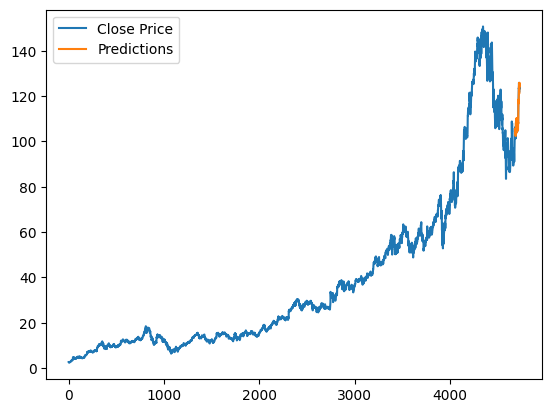

In [26]:
#plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label='Predictions')
plt.legend()
plt.show()

<Axes: >

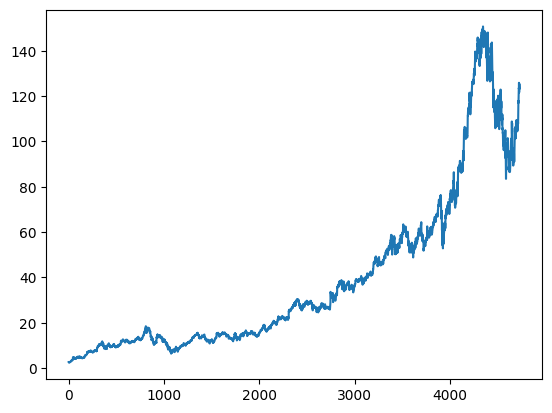

In [28]:
#show the actual data visually
data['Close'].plot()